In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt
from model_funcs import *
from scipy import integrate

In [2]:
SIFT1_datafile = "Full_FS3_SIFT1"
SIFT2_datafile = "Full_FS3_SIFT2"
FULL_SIFT2_datafile = "FS3_Sift2_FULL"

# Parameters
dt = 0.001
dt_VN = 0.025
B = 6.5*10**-3   # temperature lapse rate in troposphere in K/m
R = 287   # ideal gas constant in J/(kg.K)
g = 9.80665  # gravity at sea level in m/s2
T0 = 288.15   # standard air temperature in K
P0 = 101.325   # standard air pressure in kPa
pi = 3.1415
ft = 3.2884  # ft/m

In [3]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = '../../' + SIFT1_datafile + '.csv'
fields = ['Timestamp', 'Pres', 'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z']
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata1 = all_time

start1 = 68530
end1 = 71500
tdata1 = tdata1[start1:end1]
tdata1 = tdata1 - tdata1[0]

ax_vn1 = df['LinearAccelNed X'][start1:end1]#* ft
ay_vn1 = df['LinearAccelNed Y'][start1:end1]#* ft
az_vn1 = df['LinearAccelNed Z'][start1:end1]#* -ft

ax_g1 = df['LinearAccelNed X'][start1:end1]/9.8
ay_g1 = df['LinearAccelNed Y'][start1:end1]/9.8
az_g1 = df['LinearAccelNed Z'][start1:end1]/-9.8

In [4]:
################## DATA FRAME ##################
datafile = '../../' + FULL_SIFT2_datafile + '.csv'
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata2 = all_time

start2 = 65_400#68530
end2 = 68_400#71500
tdata2 = tdata2[start2:end2]
tdata2 = tdata2 - tdata2[0]

ax_vn2 = df['LinearAccelNed X'][start2:end2]#* ft
ay_vn2 = df['LinearAccelNed Y'][start2:end2]#* ft
az_vn2 = df['LinearAccelNed Z'][start2:end2]#* -ft

ax_g2 = df['LinearAccelNed X'][start2:end2]/9.8
ay_g2 = df['LinearAccelNed Y'][start2:end2]/9.8
az_g2 = df['LinearAccelNed Z'][start2:end2]/-9.8

In [ ]:
all_time = df['Timestamp'].values
all_pres = df['Pres'].values

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1, ax_g1, color='red', label='x')
l3 = ax.plot(tdata1, ay_g1, color='green', label='y')
l4 = ax.plot(tdata1, az_g1, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

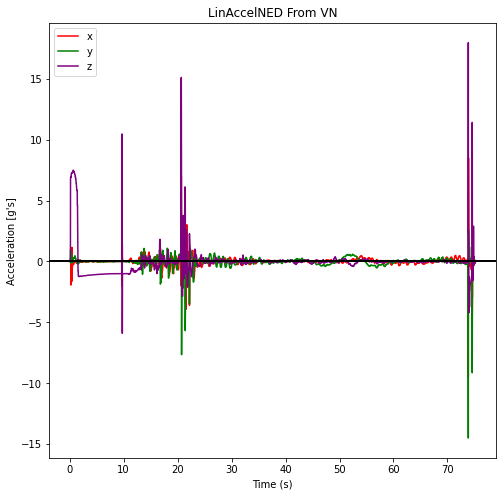

In [5]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1, ax_g1, color='red', label='x')
l3 = ax.plot(tdata1, ay_g1, color='green', label='y')
l4 = ax.plot(tdata1, az_g1, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

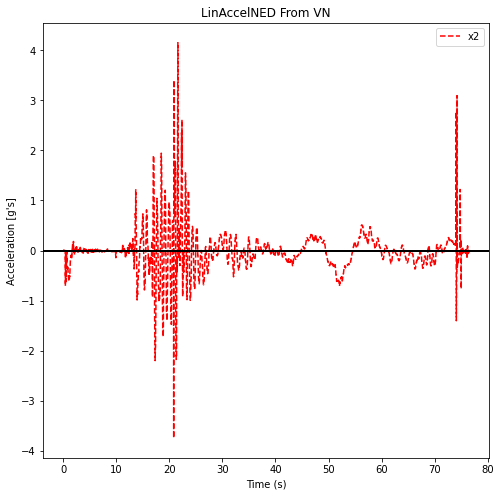

In [7]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata2, ax_g2, color='red', label='x2', linestyle='--')
#l3 = ax.plot(tdata2, ay_g2, color='green', label='y2', linestyle='--')
#l4 = ax.plot(tdata2, az_g2, color='purple', label='z2', linestyle='--')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

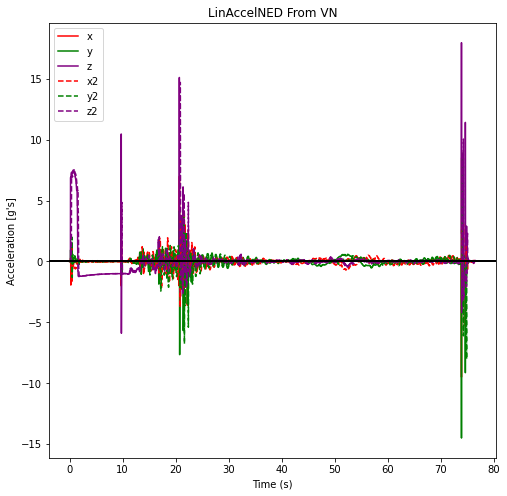

In [7]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1, ax_g1, color='red', label='x')
l3 = ax.plot(tdata1, ay_g1, color='green', label='y')
l4 = ax.plot(tdata1, az_g1, color='purple', label='z')

l2 = ax.plot(tdata2, ax_g2, color='red', label='x2', linestyle='--')
l3 = ax.plot(tdata2, ay_g2, color='green', label='y2', linestyle='--')
l4 = ax.plot(tdata2, az_g2, color='purple', label='z2', linestyle='--')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

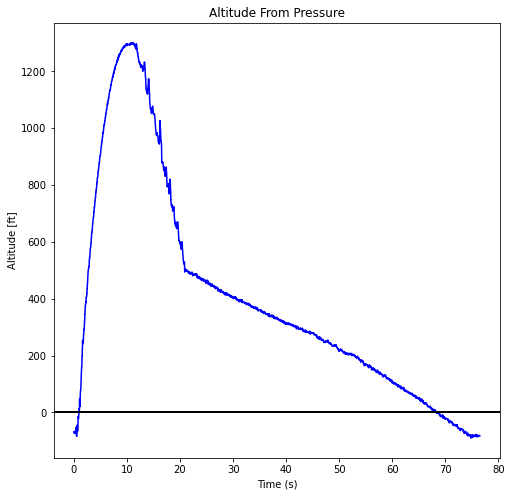

In [8]:
def nasa_pres(P, P0=101.29, T0=288.08):
    T = T0*((P / P0)**(1 / 5.256)) - 273.1
    h = (T-15.04)/(-0.00649)
    return h


P = df['Pres'][start2:end2]
v_NASA_pres = np.vectorize(nasa_pres)
altitude_NASA_pres = v_NASA_pres(P, P0=99.035, T0=288.1)*ft #+ 70

fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata2, altitude_NASA_pres, color='blue', label='Pressure Derived')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Pressure")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
#ax.legend()
plt.show()

## Post Drogue

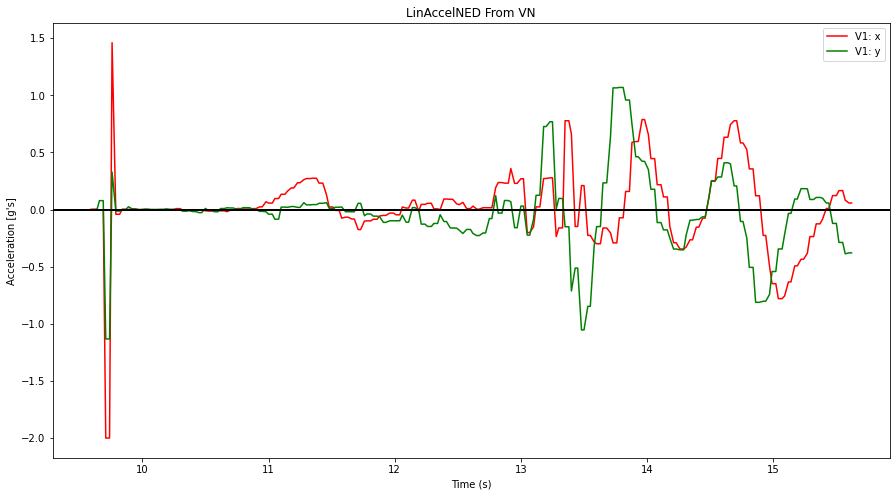

In [82]:
start_drogue = 380
end_drogue = 620

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1[start_drogue:end_drogue], ax_g1[start_drogue:end_drogue], color='red', label='V1: x')
l2 = ax.plot(tdata1[start_drogue:end_drogue], ay_g1[start_drogue:end_drogue], color='green', label='V1: y')

#l2 = ax.plot(tdata2[start_drogue:end_drogue], ax_g2[start_drogue:end_drogue], linestyle='--', color='red', label='V2: x')
#l2 = ax.plot(tdata2[start_drogue:end_drogue], ay_g2[start_drogue:end_drogue], linestyle='--', color='green', label='V2: y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
#plt.ylim((-2, 2))

ax.legend()
plt.show()

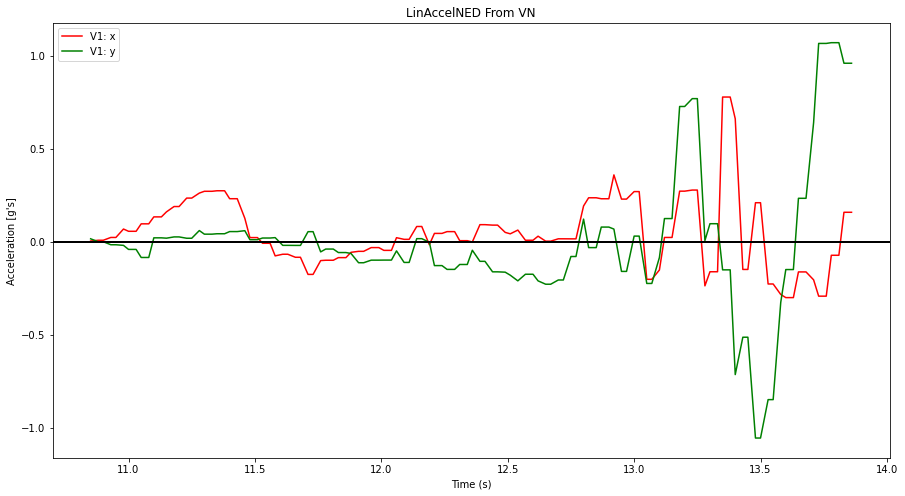

In [88]:
start_signal = 430
end_signal = 550

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1[start_signal:end_signal], ax_g1[start_signal:end_signal], color='red', label='V1: x')
l2 = ax.plot(tdata1[start_signal:end_signal], ay_g1[start_signal:end_signal], color='green', label='V1: y')

#l2 = ax.plot(tdata2[start_signal:end_signal], ax_g2[start_signal:end_signal], linestyle='--', color='red', label='V2: x')
#l2 = ax.plot(tdata2[start_signal:end_signal], ay_g2[start_signal:end_signal], linestyle='--', color='green', label='V2: y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
#plt.ylim((-2, 2))

ax.legend()
plt.show()

In [94]:
integrate.trapz(ax_g1[start_signal:end_signal], dx=dt_VN)

0.14211373584183673

In [95]:
integrate.trapz(ay_g1[start_signal:end_signal], dx=dt_VN)

-0.026320413367346935